In [1]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bbox=pd.read_csv('bbox.csv')
bbox_1=pd.read_csv('bbox-1.csv')

True

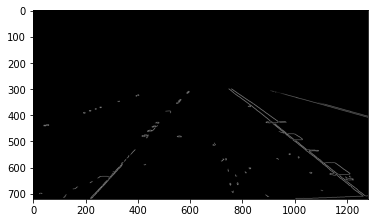

In [80]:
nb=13*5+15
img=plt.imread(r'D:\dataset\train_set\clips\0313-2\{}\20.jpg'.format(nb))

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gimg=cv2.GaussianBlur(gimg, (5, 5), 0)

canny = cv2.Canny(gimg, 50, 100,apertureSize = 3)

mask=np.zeros(canny.shape[:2],dtype='uint8')
pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

cv2.fillPoly(mask, [pts],(255, 255, 255))
for i in eval(bbox.iloc[13]['bbox']):
    pts = np.array([[i[1],i[0]],[i[3],i[0]],[i[3],i[2]],[i[1],i[2]]], np.int32)
    
    cv2.fillPoly(mask,[pts],(0,0,0))

canny=cv2.bitwise_and(canny,canny,mask=mask)

plt.imshow(canny,'gray')
cv2.imwrite('ppt6.jpg',canny)

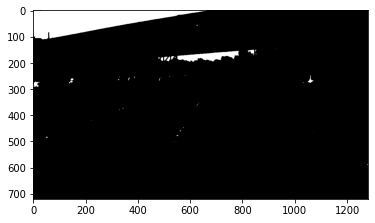

In [71]:
nb=13*5+15
path=r'D:\dataset\train_set\clips\0313-1\{}\20.jpg'.format(nb)
img=plt.imread(path)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gimg=cv2.GaussianBlur(gimg, (9, 9), 0)

canny = cv2.Canny(gimg, 50, 100,apertureSize = 3)

mask=np.zeros(canny.shape[:2],dtype='uint8')
pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

cv2.fillPoly(mask, [pts],(255, 255, 255))
for i in eval(bbox_1.iloc[128]['bbox']):
    pts = np.array([[i[1],i[0]],[i[3],i[0]],[i[3],i[2]],[i[1],i[2]]], np.int32)
    cv2.fillPoly(mask,[pts],(0,0,0))

canny=cv2.bitwise_and(canny,canny,mask=mask)

gry = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
lower = np.array([0,190,0])
upper = np.array([255,255,255])
yellower = np.array([15,30,115])
yelupper = np.array([35,204,255])
yellowmask = cv2.inRange(hls, yellower, yelupper)
whitemask = cv2.inRange(hls,lower,upper)
combinmask=cv2.bitwise_or(yellowmask, whitemask)

result=np.multiply(gry,combinmask)
_,result = cv2.threshold(result, 0 ,255, cv2.THRESH_BINARY)
plt.imshow(result,'gray')

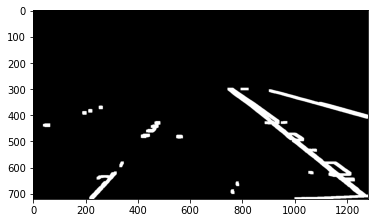

In [82]:
nb=7*60+60
path=r'D:\dataset\train_set\clips\0313-1\{}\20.jpg'.format(nb)
img=plt.imread(path)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gimg=cv2.GaussianBlur(gimg, (7, 7), 0)

canny = cv2.Canny(gimg, 50, 100,apertureSize = 3)

mask=np.zeros(canny.shape[:2],dtype='uint8')
pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

cv2.fillPoly(mask, [pts],(255, 255, 255))
for i in eval(bbox_1.iloc[128]['bbox']):
    pts = np.array([[i[1],i[0]],[i[3],i[0]],[i[3],i[2]],[i[1],i[2]]], np.int32)
    cv2.fillPoly(mask,[pts],(0,0,0))

canny=cv2.bitwise_and(canny,canny,mask=mask)

gry = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
lower = np.array([0,190,0])
upper = np.array([255,255,255])
yellower = np.array([10,0,90])
yelupper = np.array([50,255,255])
yellowmask = cv2.inRange(hls, yellower, yelupper)
whitemask = cv2.inRange(hls,lower,upper)
combinmask=cv2.bitwise_or(yellowmask, whitemask)

result=np.multiply(gry,combinmask)
_,result = cv2.threshold(result, 0 ,255, cv2.THRESH_BINARY)

mask=np.zeros(result.shape[:2],dtype='uint8')
pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

cv2.fillPoly(mask, [pts],(255, 255, 255))
kernel=np.ones((10,10))
canny = cv2.dilate(canny, kernel)
result=cv2.bitwise_or(result,canny)
result=cv2.bitwise_and(result,result,mask=mask)


minLineLength = 50
maxLineGap = 10
lines = cv2.HoughLinesP(result, 1, np.pi/180, 100,minLineLength,maxLineGap)

left1=[]
left2=[]
right1=[]
right2=[]
X=[]
Y=[]
for line in lines:
    
    x1=line[0][0]
    y1=line[0][1]
    x2=line[0][2]
    y2=line[0][3]
    if y1==y2:
        continue
    if (y1-y2)**2+(x1-x2)**2<100:
        continue
    if np.abs((y1-y2)/(x1-x2))<0.2:
        continue
        
    X.append(x1)
    X.append(x2)
    Y.append(y1)
    Y.append(y2)

hmask=np.zeros(result.shape[:2],dtype='uint8')
count=0
while count<len(X)//2:
    cv2.line(hmask, (X[count*2], Y[count*2]), (X[count*2+1], Y[count*2+1]), (255, 255, 255), 2)

    count+=1
count=0
while count<len(X):

    cv2.circle(img,(X[count], Y[count]),5,(0, 0, 255))
    
    count+=1


lane_lines=sequential_RANSAC(X,Y) 

plt.imshow(result,'gray')

#plt.imshow(result,'gray')
#plt.imshow(hmask,'gray')
plt.imshow(canny,'gray')
#cv2.imwrite('lanes.jpg',img)
result={'h_samples':list(range(160,720,10)),'raw_file':path}
for i in lane_lines:
    X=[]
    Y=[]
    for y in range(240,720,10):
        if y<280:
            x=-2
            
        else:
            x=(y-i[1])/i[0]
            if x<0 or x>1280:
                x=-2
        X.append(x)
        Y.append(y)
    if 'lanes' not in result:
        result['lanes']=[]
        result['lanes'].append(X)
    else:
        result['lanes'].append(X)
        
json_str = json.dumps(result)
with open('pred.json', 'w') as json_file:
    json_file.write(json_str)

In [143]:
json_str = json.dumps(result)
with open('pred.json', 'w') as json_file:
    json_file.write(json_str)

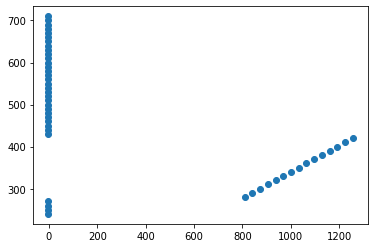

In [144]:
plt.scatter(X,Y)

plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import warnings

warnings.filterwarnings("ignore")

def get_distance(x,y,a,b):
    return np.abs(a*x+b-y)/np.sqrt(a**2+1)
def sequential_RANSAC(points_x,points_y,iters=5000,sigma=5):
    RANDOM_X=points_x
    RANDOM_Y=points_y
    #print(RANDOM_X)
    OSIZE = len(RANDOM_X)

    result=[]
    P = 0.99

    count=0
    while len(RANDOM_X)>0.01*OSIZE:
        best_a = 0
        best_b = 0
        pretotal = 0
        bestindex=[]
        SIZE=len(RANDOM_X)
        #print(SIZE)
        for i in range(iters):
            sample_index = random.sample(range(SIZE),2)
            #print(sample_index)
            x_1 = RANDOM_X[sample_index[0]]
            x_2 = RANDOM_X[sample_index[1]]
            y_1 = RANDOM_Y[sample_index[0]]
            y_2 = RANDOM_Y[sample_index[1]]

            a = (y_2 - y_1) / (x_2 - x_1)
            b = y_1 - a * x_1

            total_inlier = 0
            inlierp=[]
            for index in range(SIZE):
                y_estimate = a * RANDOM_X[index] + b
                if get_distance(RANDOM_X[index],RANDOM_Y[index],a,b) < sigma:
                    total_inlier = total_inlier + 1

            for index in range(SIZE):
                y_estimate = a * RANDOM_X[index] + b
                if get_distance(RANDOM_X[index],RANDOM_Y[index],a,b) < sigma+45:
                    inlierp.append(index)

            if total_inlier > pretotal and np.abs(a)>0.2:
                pretotal = total_inlier
                best_a = a
                best_b = b
                bestindex=inlierp



        
        
        if best_a<0:
            
            x_end=(300-best_b)/best_a
            x_start=(720-best_b)/best_a
            if x_start<0:
                x_start=0
        else:
            x_start=(300-best_b)/best_a
            x_end=(720-best_b)/best_a
            if x_end>1280:
                x_end=1280
        X=np.array([i for i in range(int(x_start),int(x_end),10)])
        Y = best_a * X + best_b

        RANDOM_X=np.delete(RANDOM_X,bestindex)
        RANDOM_Y=np.delete(RANDOM_Y,bestindex)

        count+=1
        result.append((best_a,best_b))
        if count==4:
            break
    return result
   

In [285]:
for j in range(30,50):
    nb=j*60+60
    img=plt.imread(r'D:\dataset\train_set\clips\0313-1\{}\20.jpg'.format(nb))

    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gimg=cv2.GaussianBlur(gimg, (9, 9), 0)

    canny = cv2.Canny(gimg, 50, 100,apertureSize = 3)

    mask=np.zeros(canny.shape[:2],dtype='uint8')
    pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

    cv2.fillPoly(mask, [pts],(255, 255, 255))
    for i in eval(bbox_1.iloc[j]['bbox']):
        pts = np.array([[i[1],i[0]],[i[3],i[0]],[i[3],i[2]],[i[1],i[2]]], np.int32)
        cv2.fillPoly(mask,[pts],(0,0,0))

    canny=cv2.bitwise_and(canny,canny,mask=mask)

    gry = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    lower = np.array([0,220,0])
    upper = np.array([255,255,255])
    yellower = np.array([10,0,90])
    yelupper = np.array([50,255,255])
    yellowmask = cv2.inRange(hls, yellower, yelupper)
    whitemask = cv2.inRange(hls,lower,upper)
    combinmask=cv2.bitwise_or(yellowmask, whitemask)

    result=np.multiply(gry,combinmask)
    _,result = cv2.threshold(result, 0 ,255, cv2.THRESH_BINARY)

    mask=np.zeros(result.shape[:2],dtype='uint8')
    pts = np.array([[1280,720],[1280,400],[880,300],[400,300],[0,400],[0,720]], np.int32)

    cv2.fillPoly(mask, [pts],(255, 255, 255))
    kernel=np.ones((10,10))
    canny = cv2.dilate(canny, kernel)
    result=cv2.bitwise_or(result,canny)
    result=cv2.bitwise_and(result,result,mask=mask)



    #result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)


    minLineLength = 50
    maxLineGap = 10
    lines = cv2.HoughLinesP(result, 1, np.pi/180, 100,minLineLength,maxLineGap)

    left1=[]
    left2=[]
    right1=[]
    right2=[]
    X=[]
    Y=[]
    for line in lines:

        x1=line[0][0]
        y1=line[0][1]
        x2=line[0][2]
        y2=line[0][3]
        if y1==y2:
            continue
        if (y1-y2)**2+(x1-x2)**2<100:
            continue
        if np.abs((y1-y2)/(x1-x2))<0.2:
            continue

        X.append(x1)
        X.append(x2)
        Y.append(y1)
        Y.append(y2)

    hmask=np.zeros(result.shape[:2],dtype='uint8')
   
    count=0
    while count<len(X):

        cv2.circle(img,(X[count], Y[count]),5,(0, 0, 255))

        count+=1


    lane_lines=sequential_RANSAC(X,Y) 
    for i in lane_lines:
        draw_points = (np.asarray([i[0], i[1]]).T).astype(np.int32)
        cv2.polylines(img, [draw_points], False, (0,0,0),5)




    
    cv2.imwrite(f'{j}_lanes.jpg',img)

In [79]:
a=np.array([[1,0,0],[0,0,1],[0,0,1]])
a.nonzero()

(array([0, 1, 2], dtype=int64), array([0, 2, 2], dtype=int64))